# CelebA Training with Distance Weight

In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, VGG16Model, ResNet50Model, EfficientB3Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# to reproduce

seed = 42
random.seed(seed) #　ほかのモジュールで使われているかも
np.random.seed(seed) # ほかのモジュールで使われているかも
torch.manual_seed(seed) # Pytorchの中のシード
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない
from distancetraining import ModelTrainer

# Efficientnet

In [19]:
db = "CelebA"
model_name = "efficientnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

In [20]:
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [21]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


Validation Accuracy: 0.4925 | Loss: 0.0007 | F1: 0.0163 | AUC: 0.5739
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0199 | AUC: 0.6210
Validation Accuracy: 0.4934 | Loss: 0.0006 | F1: 0.0217 | AUC: 0.6742
Validation Accuracy: 0.5525 | Loss: 0.0005 | F1: 0.2390 | AUC: 0.7283
Validation Accuracy: 0.5970 | Loss: 0.0006 | F1: 0.3648 | AUC: 0.7762
Validation Accuracy: 0.7151 | Loss: 0.0004 | F1: 0.6302 | AUC: 0.8493
Validation Accuracy: 0.7709 | Loss: 0.0003 | F1: 0.7378 | AUC: 0.8822
Validation Accuracy: 0.7648 | Loss: 0.0003 | F1: 0.7128 | AUC: 0.8815
Validation Accuracy: 0.7474 | Loss: 0.0003 | F1: 0.6782 | AUC: 0.8911
Validation Accuracy: 0.7709 | Loss: 0.0003 | F1: 0.7210 | AUC: 0.8999
Validation Accuracy: 0.7184 | Loss: 0.0003 | F1: 0.6213 | AUC: 0.9102
Validation Accuracy: 0.8144 | Loss: 0.0003 | F1: 0.7975 | AUC: 0.9053
Validation Accuracy: 0.8112 | Loss: 0.0005 | F1: 0.7825 | AUC: 0.9045
Validation Accuracy: 0.8308 | Loss: 0.0004 | F1: 0.8083 | AUC: 0.9258
Validation Accuracy:

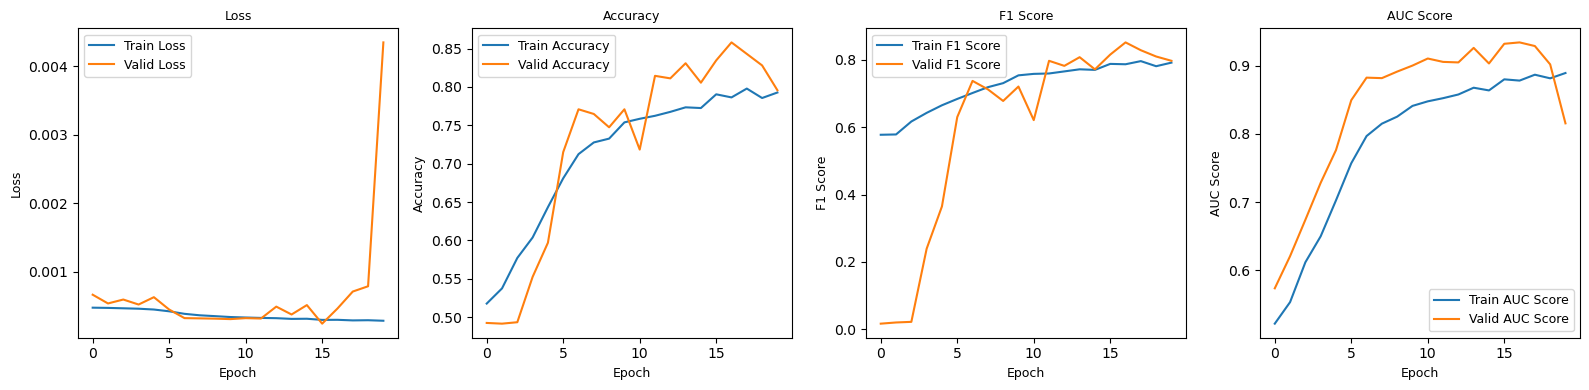

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB3Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [23]:
model = EfficientB3Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1049
           1       0.92      0.78      0.85      1085

    accuracy                           0.85      2134
   macro avg       0.86      0.86      0.85      2134
weighted avg       0.86      0.85      0.85      2134

Skin tone 1: Accuracy 0.8509840674789129
Skin tone 2: Accuracy 0.8575445173383318


In [24]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1047
           1       0.92      0.81      0.86      1082

    accuracy                           0.87      2129
   macro avg       0.87      0.87      0.87      2129
weighted avg       0.87      0.87      0.87      2129

Skin tone 2: Accuracy 0.8766233766233766
Skin tone 1: Accuracy 0.8582302568981922


# Resnet

In [25]:
model_name = "resnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.4920 | Loss: 0.0006 | F1: 0.0018 | AUC: 0.6544
Validation Accuracy: 0.6659 | Loss: 0.0005 | F1: 0.5113 | AUC: 0.8543
Validation Accuracy: 0.7610 | Loss: 0.0003 | F1: 0.6935 | AUC: 0.9379
Validation Accuracy: 0.7938 | Loss: 0.0003 | F1: 0.7468 | AUC: 0.9567
Validation Accuracy: 0.8233 | Loss: 0.0003 | F1: 0.7952 | AUC: 0.9446
Validation Accuracy: 0.8486 | Loss: 0.0002 | F1: 0.8274 | AUC: 0.9629
Validation Accuracy: 0.7619 | Loss: 0.0004 | F1: 0.6976 | AUC: 0.9034
Validation Accuracy: 0.7540 | Loss: 0.0012 | F1: 0.6847 | AUC: 0.7959
Validation Accuracy: 0.8927 | Loss: 0.0005 | F1: 0.8859 | AUC: 0.9452
Validation Accuracy: 0.8107 | Loss: 0.0021 | F1: 0.7728 | AUC: 0.9007
Validation Accuracy: 0.8524 | Loss: 0.0002 | F1: 0.8331 | AUC: 0.9634
Validation Accuracy: 0.8908 | Loss: 0.0007 | F1: 0.8899 | AUC: 0.9332
Validation Accuracy: 0.8894 | Loss: 0.0003 | F1: 0.8804 | AUC: 0.9576
Validation Accuracy: 0.9082 | Loss: 0.0004 | F1: 0.9047 | AUC: 0.9646
Validation Accuracy:

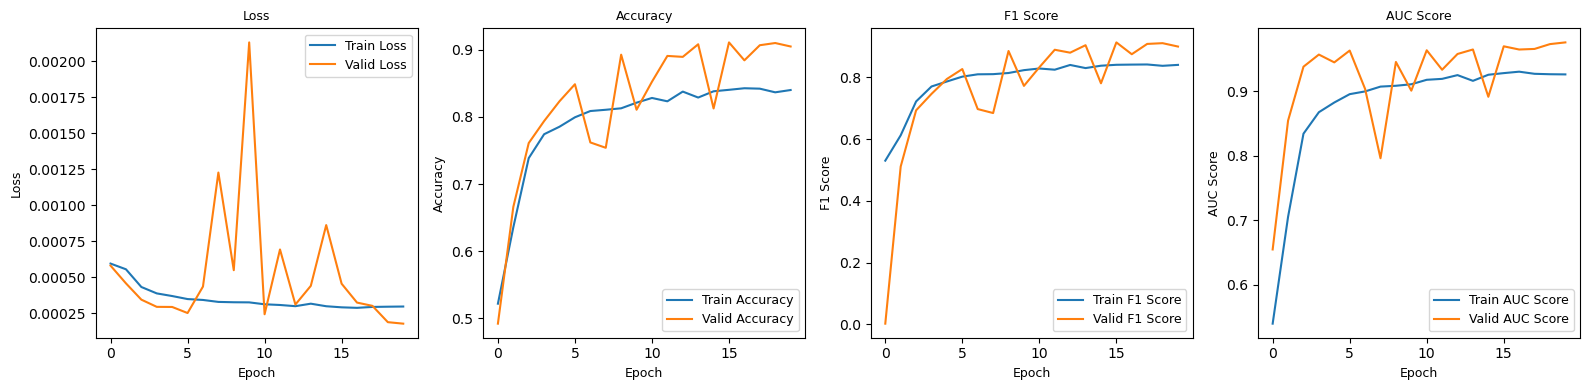

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [27]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1049
           1       0.95      0.88      0.91      1085

    accuracy                           0.91      2134
   macro avg       0.91      0.91      0.91      2134
weighted avg       0.91      0.91      0.91      2134

Skin tone 1: Accuracy 0.9203373945641987
Skin tone 2: Accuracy 0.9044048734770385


In [28]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1047
           1       0.96      0.87      0.91      1082

    accuracy                           0.91      2129
   macro avg       0.92      0.92      0.91      2129
weighted avg       0.92      0.91      0.91      2129

Skin tone 2: Accuracy 0.9128014842300557
Skin tone 1: Accuracy 0.917221693625119


# VGG

In [29]:
model_name = "vgg"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.6888 | Loss: 0.0003 | F1: 0.5597 | AUC: 0.9290
Validation Accuracy: 0.8749 | Loss: 0.0002 | F1: 0.8647 | AUC: 0.9591
Validation Accuracy: 0.8913 | Loss: 0.0002 | F1: 0.8922 | AUC: 0.9593
Validation Accuracy: 0.8500 | Loss: 0.0002 | F1: 0.8285 | AUC: 0.9614
Validation Accuracy: 0.8636 | Loss: 0.0002 | F1: 0.8571 | AUC: 0.9411
Validation Accuracy: 0.8458 | Loss: 0.0003 | F1: 0.8401 | AUC: 0.9263
Validation Accuracy: 0.4934 | Loss: 0.0004 | F1: 0.0073 | AUC: 0.8906
Validation Accuracy: 0.4916 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.8155
Validation Accuracy: 0.4916 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.7596
Validation Accuracy: 0.4916 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.7052
Validation Accuracy: 0.4916 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.5135
Validation Accuracy: 0.4916 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.5000
Validation Accuracy: 0.4916 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.5000
Validation Accuracy: 0.4916 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.5000
Validation Accuracy:

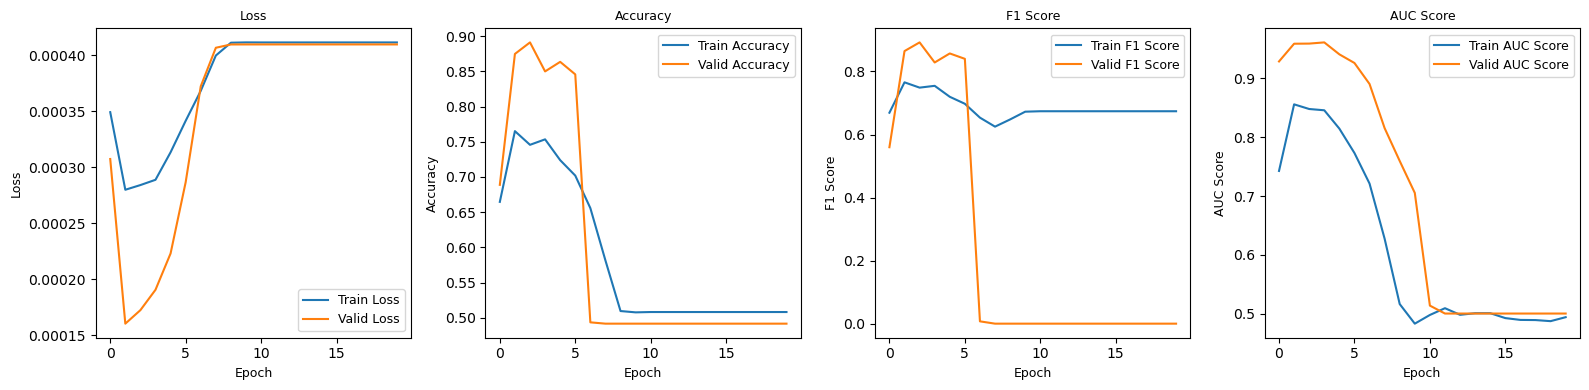

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [31]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1049
           1       0.93      0.85      0.89      1085

    accuracy                           0.89      2134
   macro avg       0.89      0.89      0.89      2134
weighted avg       0.89      0.89      0.89      2134

Skin tone 1: Accuracy 0.9034676663542643
Skin tone 2: Accuracy 0.8744142455482662


In [32]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1047
           1       0.94      0.83      0.88      1082

    accuracy                           0.88      2129
   macro avg       0.89      0.88      0.88      2129
weighted avg       0.89      0.88      0.88      2129

Skin tone 2: Accuracy 0.8747680890538033
Skin tone 1: Accuracy 0.8934348239771646
